In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
data = pd.read_csv('April 19.csv', index_col=0)

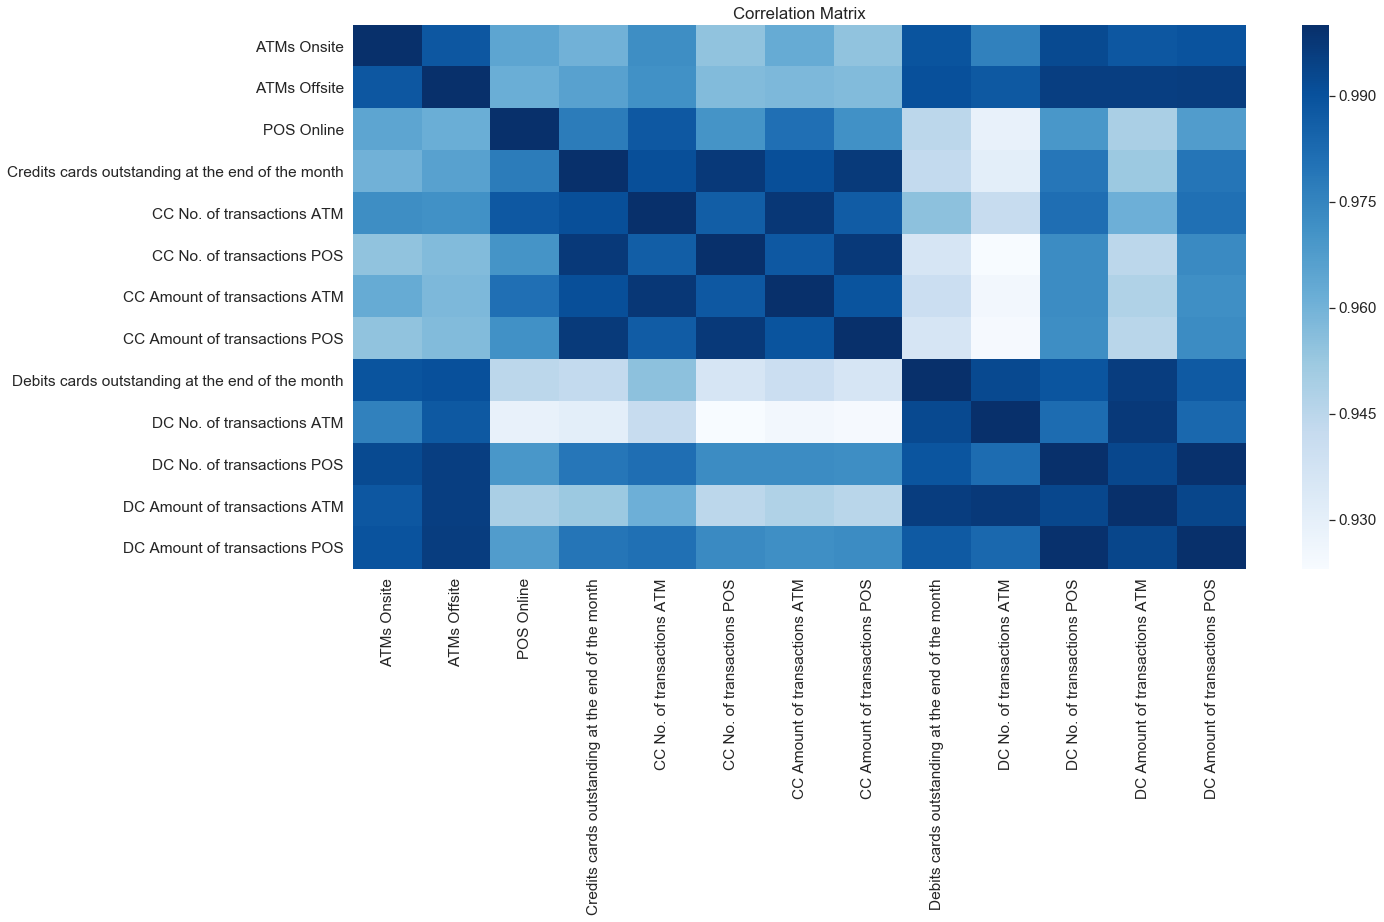

In [3]:
corr = data.corr()

plt.figure(figsize=(20, 10))

sns.set(font_scale=1.4)
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="Blues")
plt.title("Correlation Matrix")

plt.show()

In [4]:
data['Total ATMs'] = data['ATMs Onsite'] + data['ATMs Offsite']

In [16]:
data['Total ATMs'].sort_values(ascending=False).head()

18    58489.0
19    16888.0
27    15063.0
26    13320.0
2     13171.0
Name: Total ATMs, dtype: float64

In [17]:
data[data['Total ATMs'] == 58489.0]

,Bank Name,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS,Total ATMs
18,STATE BANK OF INDIA,25606.0,32883.0,589127.0,8734604.0,160944.0,28644056.0,610.928567,105131.753685,297165746.0,376403513.0,117026441.0,1.130261e+06,176121.198837,58489.0


In [10]:
data['Bank Name']

0                            ALLAHABAD BANK
1                               ANDHRA BANK
2                            BANK OF BARODA
3                             BANK OF INDIA
4                       BANK OF MAHARASHTRA
5                               CANARA BANK
6                     CENTRAL BANK OF INDIA
7                          CORPORATION BANK
8                               INDIAN BANK
9                      INDIAN OVERSEAS BANK
10                ORIENTAL BANK OF COMMERCE
11                     PUNJAB AND SIND BANK
12                     PUNJAB NATIONAL BANK
13                           SYNDICATE BANK
14                                 UCO BANK
15                      UNION BANK OF INDIA
16                     UNITED BANK OF INDIA
17                                 IDBI LTD
18                      STATE BANK OF INDIA
19                            AXIS BANK LTD
20                         BANDHAN BANK LTD
21                 CATHOLIC SYRIAN BANK LTD
22                          CITY

In [15]:
data.tail(5)

,Bank Name,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS,Total ATMs
59,JANA SMALL FINANCE BANK LIMITED,120.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,227703.0,113799.0,59353.0,392.053400,74.692451,123.0
60,NORTH EAST SMALL FINANCE BANK LIMITED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58716.0,9712.0,2616.0,33.961196,12.725397,0.0
61,SURYODAY SMALL FINANCE BANK LIMITED,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18118.0,33576.0,9926.0,63.570200,14.004844,26.0
62,UJJIVAN SMALL FINANCE BANK LIMITED,384.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3108364.0,2053913.0,305994.0,8379.599100,262.127717,387.0
63,UTKARSH SMALL FINANCE BANK LIMITED,91.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,195956.0,86281.0,42669.0,312.598086,124.805201,127.0


In [14]:
data = data.drop(data.index[[64,65]])

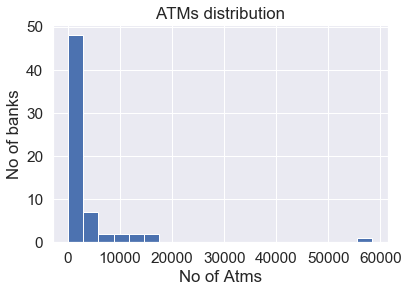

In [19]:
plt.title("ATMs distribution")
plt.xlabel('No of Atms')
plt.ylabel('No of banks')
plt.hist(data['Total ATMs'], bins=20)
plt.show()

In [20]:

data_zscaled = data.copy()
data_zscaled = data_zscaled.drop('Bank Name', axis=1)

data_zscaled = data_zscaled.apply(zscore)

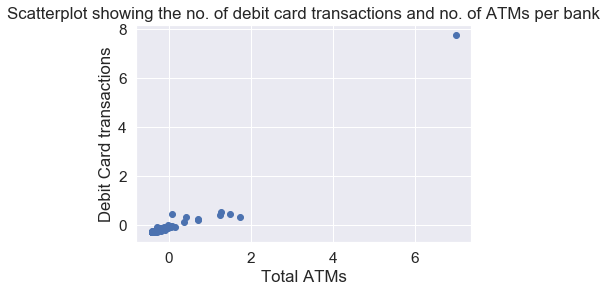

In [21]:
plt.scatter(data_zscaled['Total ATMs'], data_zscaled['DC No. of transactions ATM'])
plt.title("Scatterplot showing the no. of debit card transactions and no. of ATMs per bank")
plt.xlabel("Total ATMs")
plt.ylabel("Debit Card transactions")
plt.show()

In [22]:
data['trans_per_atm'] = 0

for i in range(len(data)):

    if data['Total ATMs'][i] !=0 :
        data['trans_per_atm'][i] = data['DC No. of transactions ATM'][i] / data['Total ATMs'][i]
        
    else:
        data['trans_per_atm'][i] = 0

C:\Users\PUNAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\PUNAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
print(data['trans_per_atm'].mean())

print(np.percentile(data['trans_per_atm'], [25, 50, 75]))

12351.21875
[1220.5  2587.   4153.75]


In [24]:
data_below_75P = data[data['trans_per_atm'] < 4154]

data_above_75P = data[data['trans_per_atm'] > 4154]

In [27]:
print(len(data_below_75P))

48


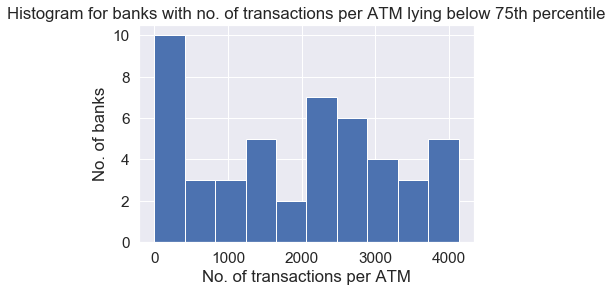

In [26]:
plt.hist(data_below_75P['trans_per_atm'])
plt.title("Histogram for banks with no. of transactions per ATM lying below 75th percentile")
plt.xlabel("No. of transactions per ATM")
plt.ylabel("No. of banks")
plt.show()

15


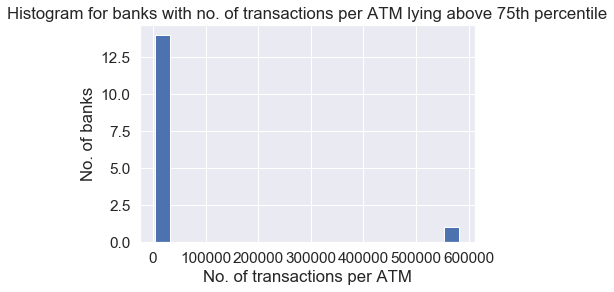

In [28]:
data_above_75P = data_above_75P.drop(data_above_75P.index[13])
print(len(data_above_75P))

plt.hist(data_above_75P['trans_per_atm'], bins=20)
plt.title("Histogram for banks with no. of transactions per ATM lying above 75th percentile")
plt.xlabel("No. of transactions per ATM")
plt.ylabel("No. of banks")
plt.show()

In [29]:
data_above_75P

,Bank Name,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS,Total ATMs,trans_per_atm
0,ALLAHABAD BANK,761.0,196.0,3116.0,0.0,0.0,0.0,0.000000,0.000000,5910582.0,9068676.0,3259136.0,2.277379e+04,3491.793271,957.0,9476
8,INDIAN BANK,3198.0,696.0,10938.0,87772.0,2746.0,149605.0,15.100000,347.300000,14590113.0,34024067.0,7691534.0,6.925430e+04,9144.100000,3894.0,8737
9,INDIAN OVERSEAS BANK,2688.0,395.0,19750.0,58364.0,1022.0,97212.0,4.102586,190.022474,16686008.0,13744815.0,5032656.0,5.837779e+04,7206.535920,3083.0,4458
15,UNION BANK OF INDIA,3933.0,2720.0,51096.0,48018.0,4144.0,235162.0,20.698041,592.784465,17056791.0,28094005.0,5082033.0,8.767418e+04,7520.869091,6653.0,4222
18,STATE BANK OF INDIA,25606.0,32883.0,589127.0,8734604.0,160944.0,28644056.0,610.928567,105131.753685,297165746.0,376403513.0,117026441.0,1.130261e+06,176121.198837,58489.0,6435
20,BANDHAN BANK LTD,481.0,0.0,27295.0,0.0,0.0,0.0,0.000000,0.000000,2915615.0,2140338.0,939112.0,8.028259e+03,1438.544989,481.0,4449
25,FEDERAL BANK LTD,1136.0,491.0,8333.0,0.0,0.0,0.0,0.000000,0.000000,5780051.0,8466910.0,5213597.0,4.399814e+04,7692.771373,1627.0,5204
28,IDFC Bank Limited,155.0,6.0,1792.0,0.0,0.0,0.0,0.000000,0.000000,1534470.0,2354495.0,1507424.0,8.634476e+03,1477.327041,161.0,14624
30,JAMMU AND KASHMIR BANK,736.0,572.0,16711.0,141126.0,8618.0,229669.0,28.382256,1007.772916,3921152.0,6720203.0,825019.0,3.110545e+04,2599.589832,1308.0,5137
36,TAMILNAD MERCANTILE BANK LTD,473.0,680.0,4647.0,19018.0,2262.0,50878.0,10.308101,182.292843,1466579.0,5258999.0,674405.0,2.202153e+04,1082.127765,1153.0,4561


In [30]:
data_below_75P.head(15)

,Bank Name,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS,Total ATMs,trans_per_atm
1,ANDHRA BANK,3023.0,773.0,13777.0,303397.0,13624.0,615600.0,62.738465,1495.788702,28852129.0,10811586.0,6953162.0,38154.666442,9341.300000,3796.0,2848
2,BANK OF BARODA,9321.0,3850.0,78791.0,324275.0,21107.0,838895.0,92.758064,1883.972070,73384771.0,32035602.0,16675739.0,125633.462026,14651.528985,13171.0,2432
3,BANK OF INDIA,2645.0,3509.0,67740.0,185605.0,22457.0,344241.0,127.086755,849.792205,36822577.0,19297659.0,10305371.0,70860.315525,11220.117556,6154.0,3135
4,BANK OF MAHARASHTRA,1306.0,554.0,2350.0,0.0,0.0,0.0,0.000000,0.000000,5649325.0,7684055.0,4955403.0,28463.649115,5602.625140,1860.0,4131
5,CANARA BANK,4760.0,4077.0,21910.0,381745.0,52412.0,786726.0,280.075180,1628.261231,18437346.0,23759272.0,12679492.0,103930.213653,17451.547785,8837.0,2688
6,CENTRAL BANK OF INDIA,2668.0,896.0,3384.0,92317.0,2422.0,163157.0,11.303391,364.376546,21197500.0,11821816.0,6037334.0,49359.594926,8047.998536,3564.0,3317
7,CORPORATION BANK,2414.0,629.0,222811.0,111173.0,2231.0,170128.0,10.888919,409.862929,6619998.0,6996637.0,4040959.0,28779.991307,5098.980537,3043.0,2299
10,ORIENTAL BANK OF COMMERCE,2337.0,282.0,8752.0,0.0,0.0,0.0,0.000000,0.000000,11262811.0,5737572.0,3775855.0,25360.900000,4515.300000,2619.0,2190
11,PUNJAB AND SIND BANK,1153.0,48.0,1066.0,0.0,0.0,0.0,0.000000,0.000000,2225672.0,1512752.0,463300.0,6349.451962,782.746339,1201.0,1259
12,PUNJAB NATIONAL BANK,5225.0,3714.0,67277.0,355448.0,6157.0,661531.0,16.859639,1405.406032,20825477.0,24617942.0,14199327.0,111699.263912,19723.260247,8939.0,2753


In [31]:
data['total_num_trans'] = 0
data['total_amt_trans'] = 0
for i in range(len(data)):
    
    data['total_num_trans'][i] = data['DC No. of transactions ATM'][i] + data['DC No. of transactions POS'][i]
    data['total_amt_trans'][i] = data['DC Amount of transactions ATM'][i] + data['DC Amount of transactions POS'][i]

    

C:\Users\PUNAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\PUNAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
data.head()

,Bank Name,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS,Total ATMs,trans_per_atm,total_num_trans,total_amt_trans
0,ALLAHABAD BANK,761.0,196.0,3116.0,0.0,0.0,0.0,0.000000,0.000000,5910582.0,9068676.0,3259136.0,22773.785279,3491.793271,957.0,9476,12327812,26265
1,ANDHRA BANK,3023.0,773.0,13777.0,303397.0,13624.0,615600.0,62.738465,1495.788702,28852129.0,10811586.0,6953162.0,38154.666442,9341.300000,3796.0,2848,17764748,47495
2,BANK OF BARODA,9321.0,3850.0,78791.0,324275.0,21107.0,838895.0,92.758064,1883.972070,73384771.0,32035602.0,16675739.0,125633.462026,14651.528985,13171.0,2432,48711341,140284
3,BANK OF INDIA,2645.0,3509.0,67740.0,185605.0,22457.0,344241.0,127.086755,849.792205,36822577.0,19297659.0,10305371.0,70860.315525,11220.117556,6154.0,3135,29603030,82080
4,BANK OF MAHARASHTRA,1306.0,554.0,2350.0,0.0,0.0,0.0,0.000000,0.000000,5649325.0,7684055.0,4955403.0,28463.649115,5602.625140,1860.0,4131,12639458,34066


In [35]:
data['amt_per_trans'] = 0

for i in range(len(data)):

    if data['total_num_trans'][i] !=0 :
        data['amt_per_trans'][i] =( data['total_amt_trans'][i] * 1000000) / data['total_num_trans'][i]
        
    else:
        data['amt_per_trans'][i] = 0

C:\Users\PUNAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\PUNAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
data['Bank Name']

0                            ALLAHABAD BANK
1                               ANDHRA BANK
2                            BANK OF BARODA
3                             BANK OF INDIA
4                       BANK OF MAHARASHTRA
5                               CANARA BANK
6                     CENTRAL BANK OF INDIA
7                          CORPORATION BANK
8                               INDIAN BANK
9                      INDIAN OVERSEAS BANK
10                ORIENTAL BANK OF COMMERCE
11                     PUNJAB AND SIND BANK
12                     PUNJAB NATIONAL BANK
13                           SYNDICATE BANK
14                                 UCO BANK
15                      UNION BANK OF INDIA
16                     UNITED BANK OF INDIA
17                                 IDBI LTD
18                      STATE BANK OF INDIA
19                            AXIS BANK LTD
20                         BANDHAN BANK LTD
21                 CATHOLIC SYRIAN BANK LTD
22                          CITY

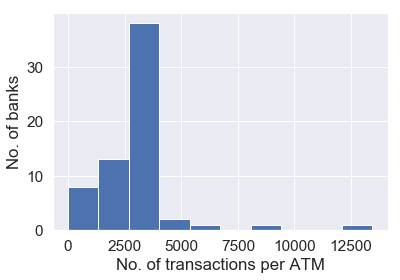

In [37]:
plt.hist(data['amt_per_trans'])
#plt.title("Histogram for banks with no. of transactions per ATM lying below 75th percentile")
plt.xlabel("No. of transactions per ATM")
plt.ylabel("No. of banks")
plt.show()

In [38]:
data.describe()

,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS,Total ATMs,trans_per_atm,total_num_trans,total_amt_trans,amt_per_trans
count,64.000000,64.000000,64.000000,6.400000e+01,64.000000,6.400000e+01,64.000000,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,64.000000,64.000000,64.000000,6.400000e+01,6.400000e+01,64.000000
mean,1714.343750,1517.203125,60079.859375,7.643875e+05,13898.687500,2.705517e+06,65.206428,9571.613348,1.288959e+07,1.274547e+07,6.368595e+06,4.604168e+04,9008.142145,3231.546875,12351.218750,1.911407e+07,5.504936e+04,3002.484375
std,3571.981084,4538.883592,151866.441393,2.215087e+06,35328.551381,7.926083e+06,172.582845,28289.102619,3.856963e+07,4.726198e+07,1.667812e+07,1.445293e+05,25060.547171,7974.257935,72486.336039,6.293232e+07,1.685998e+05,1941.608816
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,69.500000,2.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,5.294278e+05,4.705282e+05,2.024862e+05,2.053618e+03,308.791867,114.750000,1220.500000,7.327158e+05,2.399000e+03,2540.250000
50%,477.000000,271.000000,4984.500000,9.630000e+02,45.000000,1.896000e+03,0.172950,10.637546,2.758882e+06,2.247416e+06,1.536034e+06,8.870686e+03,1588.527862,1002.000000,2587.000000,4.657719e+06,1.179800e+04,3071.000000
75%,2238.000000,781.000000,26401.000000,2.150530e+05,5952.250000,4.120808e+05,29.486117,1107.181195,1.147416e+07,8.986695e+06,5.114924e+06,3.640770e+04,7285.119213,2725.000000,4153.750000,1.408212e+07,4.711100e+04,3412.750000
max,25606.000000,32883.000000,737103.000000,1.267985e+07,185365.000000,4.587032e+07,1087.520462,172032.732880,2.971657e+08,3.764035e+08,1.170264e+08,1.130261e+06,176121.198837,58489.000000,582409.000000,4.934300e+08,1.306382e+06,13444.000000


In [59]:
data['amt_per_trans'][18]

2647